## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [5]:
df.mean()


AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

In [7]:
df.var()

AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64

### Task 2: Plot boxplots for BMI, BP and Y depending on gender

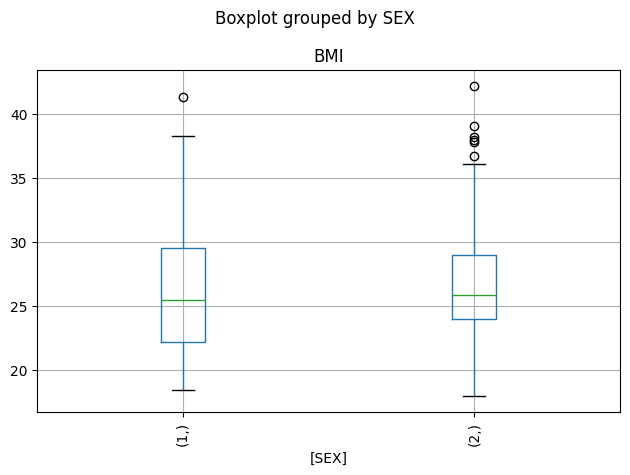

In [23]:
import matplotlib.pyplot as plt

df.boxplot(column = "BMI", by = ["SEX"])

plt.xticks(rotation = "vertical")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'BP'}, xlabel='[SEX]'>

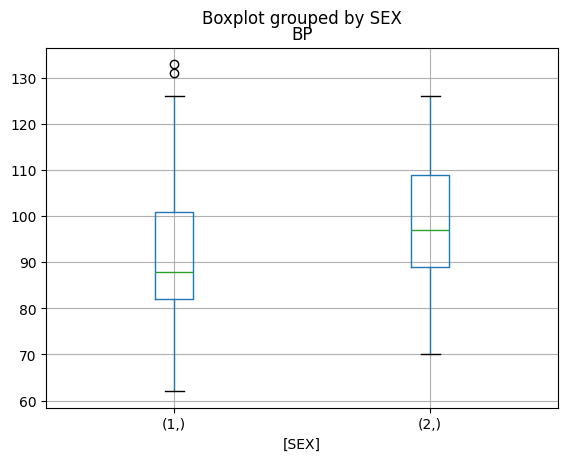

In [24]:
df.boxplot(column = "BP", by = ["SEX"])


<Axes: title={'center': 'Y'}, xlabel='[SEX]'>

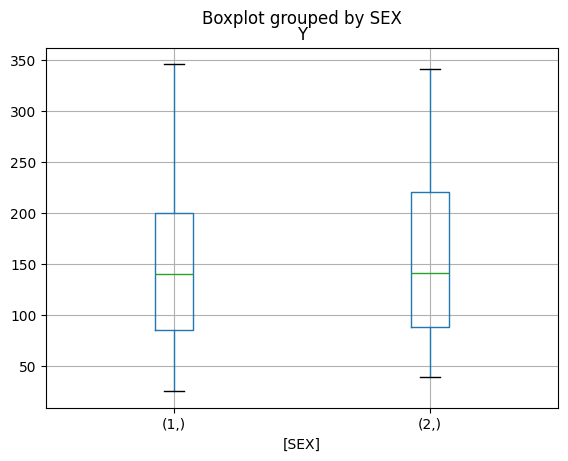

In [25]:
df.boxplot(column = "Y", by = ["SEX"])

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

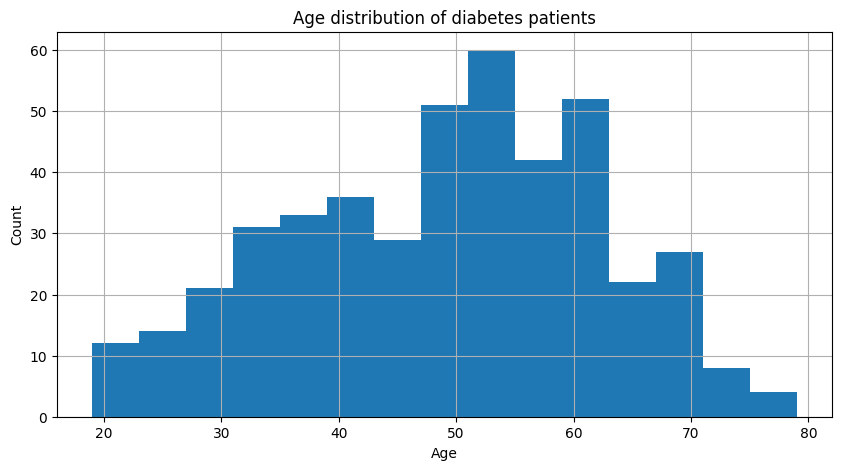

In [27]:
df["AGE"].hist(bins = 15, figsize = (10,5))
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age distribution of diabetes patients")
plt.show()

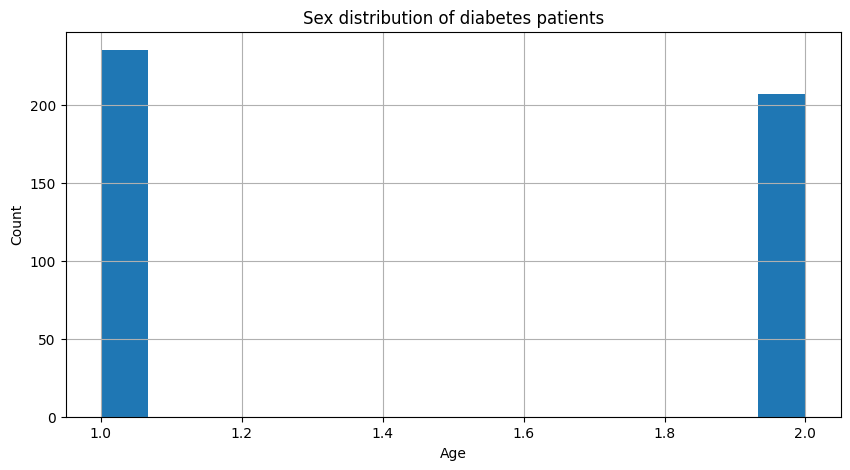

In [30]:
df["SEX"].hist(bins = 15, figsize = (10,5))
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex distribution of diabetes patients")
plt.show()

# Sex distribution of diabetes patients
It is obvious that the distribution only shows the distribution of males and females. However, we can see that the count of males is higher than the count of females.

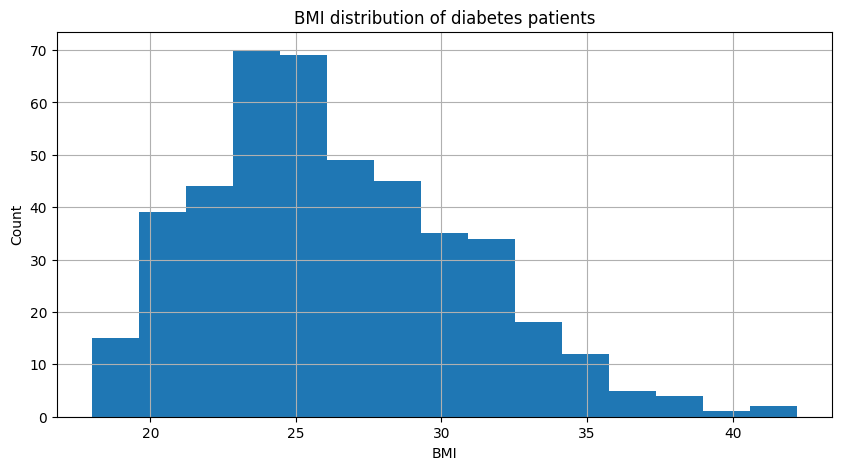

In [31]:
df["BMI"].hist(bins = 15, figsize = (10,5))
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI distribution of diabetes patients")
plt.show()

#   BMI distribution of diabetes patients
We can see that the distribution of BMI is right or positively skewed.
This means that there are a lot of outliers in the dataset. Also, most of the diabetes patients are below the BMI of 33.

However, if we remove the outliers, the distribution of BMI becomes more normal.

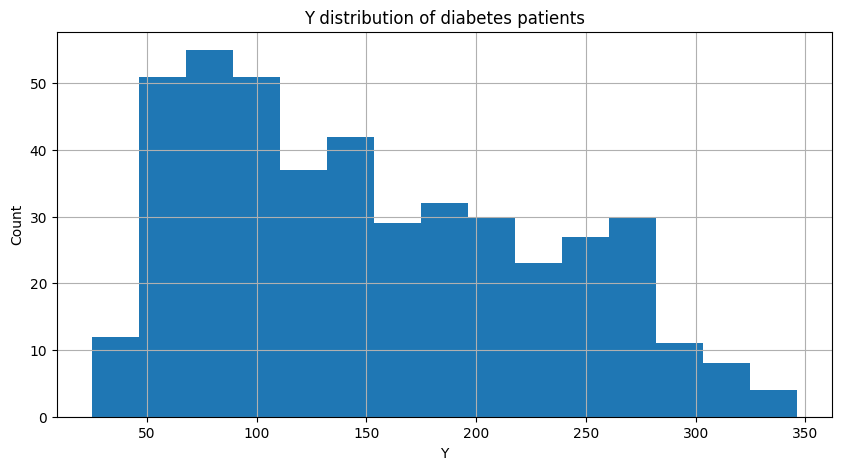

In [34]:
df["Y"].hist(bins = 15, figsize = (10,5))
plt.xlabel("Y")
plt.ylabel("Count")
plt.title("Y distribution of diabetes patients")
plt.show()

In [42]:
df["Y"].value_counts()

Y
200    6
72     6
178    5
71     5
90     5
      ..
146    1
212    1
120    1
183    1
57     1
Name: count, Length: 214, dtype: int64

Here, we can see that the distribution of Y resembles a positively skewed distribution.
We can see that the mode of the Y variable is 200, but in the bins, most of the counts lies in the range 50 to 100

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [52]:
#show correlation values between different variables and disease progression
print("Testing the correlation coefficent values between different variables and disease progression\n")
coeffs = {}
for col in df.columns:
    if col != "Y":
        print(col, df[col].corr(df["Y"]))
        coeffs[col] = df[col].corr(df["Y"])
print(f"{max (coeffs, key = coeffs.get)} is the most correlated variable with the disease progression\n with a correlation coefficient of {coeffs[max (coeffs, key = coeffs.get)]}")

Testing the correlation coefficent values between different variables and disease progression

AGE 0.18788875071891978
SEX 0.043061998451605334
BMI 0.5864501344746885
BP 0.4414817585625713
S1 0.2120224810145507
S2 0.17405358696874262
S3 -0.3947892506709184
S4 0.43045288474477267
S5 0.5658825924427439
S6 0.3824834842485811
BMI is the most correlated variable with the disease progression
 with a correlation coefficient of 0.5864501344746885


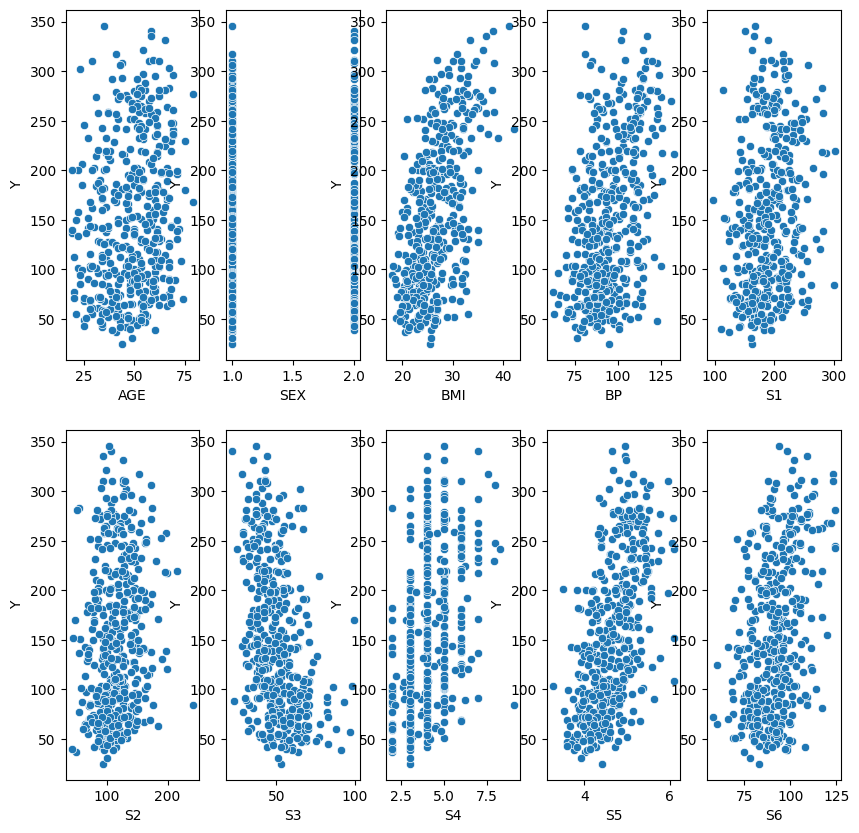

In [49]:
import seaborn as sns
fig, axes = plt.subplots(2, 5, figsize=(10, 10))
for i, col in enumerate(df.columns):
    if col!= "Y":
        sns.scatterplot(x=col, y="Y", data=df, ax=axes[i // 5, i % 5])

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women